In [113]:
import numpy as np
import pandas as pd
import math
import sys

import matplotlib.pyplot as plt 
%matplotlib inline

import random as rand
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from time import time

In [114]:
class DataSet:
    def __init__(self, name, y_name, train_file, test_file):
        self.name = name
        
        data_path = 'datasets/normalized_benchmark/'
        self.train_df = pd.read_csv(data_path + train_file)
        self.test_df = pd.read_csv(data_path + test_file)
        
        self.X_train = self.train_df.drop(y_name, axis=1)
        self.y_train = self.train_df[y_name]
        self.X_dict_train = df_features_to_dicts(self.X_train)
        
        self.X_test = self.test_df.drop(y_name, axis=1)
        self.y_test = self.test_df[y_name]
        self.X_dict_test = df_features_to_dicts(self.X_test)
    
    def create_rf_subfeatures(self, features):
        self.X_rf_train = self.X_train[features]
        self.X_rf_test = self.X_test[features]
        self.X_rf_dict_train = df_features_to_dicts(self.X_rf_train)
        self.X_rf_dict_test = df_features_to_dicts(self.X_rf_test)
        
    def create_lasso_subfeatures(self, features):
        self.X_lasso_train = self.X_train[features]
        self.X_lasso_test = self.X_test[features]
        self.X_lasso_dict_train = df_features_to_dicts(self.X_lasso_train)
        self.X_lasso_dict_test = df_features_to_dicts(self.X_lasso_test)
        
    def df_features_to_dicts(self, df):
        columns = df.columns
        dicts = []

        for index, row in df.iterrows():
            feature_dict = {}
            for col in columns:
                feature_dict[col] = row[col]
            dicts.append(feature_dict)
        return dicts

In [115]:
data_set_adult = DataSet('adult', 'income_>50k', 'adult_clean_train.csv', 'adult_clean_test.csv')
data_set_titanic = DataSet('titanic', 'Survived', 'titanic_clean_train.csv', 'titanic_clean_test.csv')
data_set_weather = DataSet('weather', 'RainTomorrow', 'weatherAUS_clean_train.csv', 'weatherAUS_clean_test.csv')
data_set_wine = DataSet('wine', 'quality', 'wine_train.csv', 'wine_test.csv')

In [116]:
print(data_set_adult.X_train.shape)
print(data_set_titanic.X_train.shape)
print(data_set_weather.X_train.shape)
print(data_set_wine.X_train.shape)

(16001, 50)
(1047, 20)
(16000, 30)
(1279, 11)


In [126]:
rf_adult_features = ['fnlwgt',
 'age',
 'education_num',
 'capital_gain',
 'hours_per_week',
 'marital_status_ Married-civ-spouse',
 'relationship_ Husband',
 'capital_loss',
 'occupation_ Exec-managerial',
 'marital_status_ Never-married',
 'occupation_ Prof-specialty',
 'workclass_ Private',
 'relationship_ Wife',
 'relationship_ Not-in-family',
 'workclass_ Self-emp-not-inc',
 'occupation_ Other-service',
 'relationship_ Own-child',
 'sex_ Male',
 'sex_ Female',
 'occupation_ Sales',
 'race_ White',
 'occupation_ Craft-repair',
 'workclass_ Self-emp-inc',
 'workclass_ Local-gov',
 'occupation_ Adm-clerical',
 'occupation_ Farming-fishing',
 'marital_status_ Divorced',
 'workclass_ Federal-gov',
 'race_ Black',
 'occupation_ Tech-support']
print(len(rf_adult_features))
lasso_adult_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'marital_status_ Married-civ-spouse', 'marital_status_ Never-married', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'relationship_ Husband', 'relationship_ Wife', 'race_ White', 'sex_ Female']
print(len(lasso_adult_features))

30
26


In [127]:
data_set_adult.create_rf_subfeatures(rf_adult_features)
data_set_adult.create_lasso_subfeatures(lasso_adult_features)

In [79]:
rf_titanic_features = ['Sex_female',
 'Sex_male',
 'Fare',
 'Age',
 'Pclass',
 'SibSp',
 'Parch',
 'CabinType_NaN',
 'Embarked_S',
 'HasTitle',
 'Embarked_C',
 'CabinType_E',
 'CabinType_C']
print(len(rf_titanic_features))
lasso_titanic_features = ['Pclass', 'Age', 'SibSp', 'HasTitle', 'Sex_female', 'CabinType_NaN', 'Embarked_C']
print(len(lasso_titanic_features))

13
7


In [91]:
data_set_titanic.create_rf_subfeatures(rf_titanic_features)
data_set_titanic.create_lasso_subfeatures(lasso_titanic_features)

In [134]:
rf_weather_features = ['Humidity3pm',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Pressure3pm',
 'Rainfall',
 'Pressure9am',
 'Cloud3pm',
 'Temp3pm',
 'MinTemp',
 'Temp9am',
 'MaxTemp',
 'WindSpeed3pm',
 'WindSpeed9am',
 'RainToday',
 'Cloud9am',
 'Evaporation',
 'WindDir3pm_N',
 'WindDir9am_N',
 'WindDir9am_W',
 'WindDir3pm_S',
 'WindGustDir_N',
 'WindGustDir_S',
 'WindDir3pm_W',
 'WindDir9am_S',
 'WindGustDir_W']
print(len(rf_weather_features))
lasso_weather_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'WindGustDir_N', 'WindGustDir_W', 'WindDir9am_N', 'WindDir9am_S', 'WindDir9am_W', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_E']
print(len(lasso_weather_features))

26
23


In [135]:
data_set_weather.create_rf_subfeatures(rf_weather_features)
data_set_weather.create_lasso_subfeatures(lasso_weather_features)

In [121]:
rf_wine_features = ['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'density',
 'chlorides',
 'fixed acidity',
 'pH']
print(len(rf_wine_features))
lasso_wine_features = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
print(len(lasso_wine_features))

8
6


In [122]:
data_set_wine.create_rf_subfeatures(rf_wine_features)
data_set_wine.create_lasso_subfeatures(lasso_wine_features)

In [130]:
k=[('Humidity3pm', 0.16664844056566114), ('Sunshine', 0.06559469761898779), ('WindGustSpeed', 0.06004722444431791), ('Humidity9am', 0.05957646472119113), ('Pressure3pm', 0.058248527345177596), ('Rainfall', 0.05452765485840308), ('Pressure9am', 0.05199798990596332), ('Cloud3pm', 0.043963551554779934), ('Temp3pm', 0.04372448794683124), ('MinTemp', 0.041923180339425055), ('Temp9am', 0.039705357663804605), ('MaxTemp', 0.03936889696190376), ('WindSpeed3pm', 0.030538242506645108), ('WindSpeed9am', 0.028152004491008506), ('RainToday', 0.027370637173374342), ('Cloud9am', 0.02440353870035101), ('Evaporation', 0.022961595761853887), ('WindDir3pm_N', 0.014052362520215422), ('WindDir9am_N', 0.013807402895038536), ('WindDir9am_W', 0.012405751981729782), ('WindDir3pm_S', 0.012091376647839689), ('WindGustDir_N', 0.011977837523994273), ('WindGustDir_S', 0.011667900794475891), ('WindDir3pm_W', 0.01150569172318644), ('WindDir9am_S', 0.011438640590705273), ('WindGustDir_W', 0.011359950662514192), ('WindDir9am_E', 0.01043985126573116), ('WindGustDir_E', 0.010416139028407899), ('WindDir3pm_E', 0.01008460180648221)]

In [131]:
[kk[0] for kk in k][:26]

['Humidity3pm',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Pressure3pm',
 'Rainfall',
 'Pressure9am',
 'Cloud3pm',
 'Temp3pm',
 'MinTemp',
 'Temp9am',
 'MaxTemp',
 'WindSpeed3pm',
 'WindSpeed9am',
 'RainToday',
 'Cloud9am',
 'Evaporation',
 'WindDir3pm_N',
 'WindDir9am_N',
 'WindDir9am_W',
 'WindDir3pm_S',
 'WindGustDir_N',
 'WindGustDir_S',
 'WindDir3pm_W',
 'WindDir9am_S',
 'WindGustDir_W']

In [93]:
data_set_wine.X_rf_train

,alcohol,sulphates,volatile acidity,total sulfur dioxide,density,chlorides,fixed acidity,pH
0,2.126559,-1.304308,-1.955533,1.942520,-3.543490,-0.795998,-0.180753,-2.723977
1,-1.072899,-1.364365,0.298039,-0.062140,-0.951180,-0.305376,-0.468869,-1.365605
2,0.526830,0.077008,0.016342,-0.463072,0.038901,0.716753,-1.102722,1.221772
3,0.056321,0.437352,0.467057,-0.648118,0.390220,-0.162278,-0.987476,2.450775
4,0.338626,-0.403449,0.354378,-0.864004,-0.280480,-0.571130,-0.872230,0.639612
...,...,...,...,...,...,...,...,...
1274,-0.978798,-1.184193,-0.547051,0.061224,0.464742,-0.264491,-0.180753,0.186821
1275,-0.602391,-0.763793,0.467057,1.294861,-0.323064,-0.305376,-0.468869,-0.071917
1276,-0.414187,-0.103163,0.016342,-0.987368,-0.424202,-0.366704,-0.007884,-0.395339
1277,-0.978798,-0.103163,0.129021,-0.894845,-0.072882,-0.366704,-0.295999,-0.330654


In [95]:
class EvalScore:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.acc = accuracy_score(y_true, y_pred)
        self.f1 = f1_score(y_true, y_pred)
        self.f1_neg = f1_score(1-y_true, 1-y_pred)
        self.conf = confusion_matrix(y_true, y_pred)

In [96]:
def compute_score(model, X, y):
    y_pred = model.predict(X)
    return EvalScore(y, y_pred)

In [97]:
def fit_compute_score(model, X_train, y_train, X_test, y_test):
    t0 = time()
    model.fit(X_train, y_train)
    duration = time() - t0
    eval_score_train = compute_score(model, X_train, y_train)
    eval_score_test = compute_score(model, X_test, y_test)
    print("train duration", duration)
    print("train accuracy", eval_score_train.acc)
    print("train f1", eval_score_train.f1)
    print("train f1 neg", eval_score_train.f1_neg)
    print("train tn, fp, fn, tp", eval_score_train.conf.ravel()) 
    print("test accuracy", eval_score_test.acc)
    print("test f1", eval_score_test.f1)
    print("test f1 neg", eval_score_test.f1_neg)
    print("test tn, fp, fn, tp", eval_score_test.conf.ravel())
    print()
    
    return eval_score_train, eval_score_test

In [100]:
dir(data_set_adult)

['X_dict_test',
 'X_dict_train',
 'X_lasso_dict_test',
 'X_lasso_dict_train',
 'X_lasso_test',
 'X_lasso_train',
 'X_rf_dict_test',
 'X_rf_dict_train',
 'X_rf_test',
 'X_rf_train',
 'X_test',
 'X_train',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_lasso_subfeatures',
 'create_rf_subfeatures',
 'df_features_to_dicts',
 'name',
 'test_df',
 'train_df',
 'y_test',
 'y_train']

In [109]:
def compare_feature_hashing(dataset):
    clf_ridge_all = RidgeClassifier(random_state=1)
    print('ridge_default')
    ridge_default_score_train, ridge_default_score_test = fit_compute_score(clf_ridge_all, dataset.X_train, dataset.y_train, dataset.X_test, dataset.y_test)

    n_estimators = 1000
    clf_randfor_all = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
    print('randfor_default')
    randfor_default_score_train, randfor_default_score_test = fit_compute_score(clf_randfor_all, dataset.X_train, dataset.y_train, dataset.X_test, dataset.y_test)

    ridge_train_score_all = []
    ridge_test_score_all = []
    ridge_rf_train_score_all = []
    ridge_rf_test_score_all = [] 
    ridge_lasso_train_score_all = []
    ridge_lasso_test_score_all = []
    randfor_train_score_all = []
    randfor_test_score_all = []
    randfor_rf_train_score_all = []
    randfor_rf_test_score_all = []
    randfor_lasso_train_score_all = []
    randfor_lasso_test_score_all = []
    for i in range(2, 11, 2):
        percent = 0.1*i
        n_features = math.ceil(dataset.X_train.shape[1]*percent)
        print("hash percent", percent, "n_features", n_features)
        print()
        hasher = FeatureHasher(n_features=n_features)
        t0 = time()
        X_train_hash = hasher.fit_transform(dataset.X_dict_train)
        X_test_hash = hasher.transform(dataset.X_dict_test)
        X_rf_train_hash = hasher.fit_transform(dataset.X_rf_dict_train)
        X_rf_test_hash = hasher.transform(dataset.X_rf_dict_test)
        X_lasso_train_hash = hasher.fit_transform(dataset.X_lasso_dict_train)
        X_lasso_test_hash = hasher.transform(dataset.X_lasso_dict_test)
        duration = time() - t0
        print("hash duration", duration)
        
        print('ridge_hash')
        clf_ridge_hash = RidgeClassifier(random_state=1)
        ridge_train_score, ridge_test_score = fit_compute_score(clf_ridge_hash, X_train_hash, dataset.y_train, X_test_hash, dataset.y_test)
        ridge_train_score_all.append(ridge_train_score)
        ridge_test_score_all.append(ridge_test_score)
        
        print('ridge_rf_hash')
        clf_ridge_rf_hash = RidgeClassifier(random_state=1)
        ridge_rf_train_score, ridge_rf_test_score = fit_compute_score(clf_ridge_rf_hash, X_rf_train_hash,dataset.y_train, X_rf_test_hash, dataset.y_test)
        ridge_rf_train_score_all.append(ridge_rf_train_score)
        ridge_rf_test_score_all.append(ridge_rf_test_score)
        
        print('ridge_lasso_hash')
        clf_ridge_lasso_hash = RidgeClassifier(random_state=1)
        ridge_train_lasso_score, ridge_test_lasso_score = fit_compute_score(clf_ridge_lasso_hash, X_lasso_train_hash, dataset.y_train, X_lasso_test_hash, dataset.y_test)
        ridge_lasso_train_score_all.append(ridge_train_lasso_score)
        ridge_lasso_test_score_all.append(ridge_test_lasso_score)

        clf_randfor_hash = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
        print('randfor_hash')
        randfor_train_score, randfor_test_score = fit_compute_score(clf_randfor_hash, X_train_hash, dataset.y_train, X_test_hash, dataset.y_test)
        randfor_train_score_all.append(randfor_train_score)
        randfor_test_score_all.append(randfor_test_score)
        
        print('randfor_rf_hash')
        clf_randfor_rf_hash = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
        randfor_rf_train_score, randfor_rf_test_score = fit_compute_score(clf_randfor_rf_hash, X_rf_train_hash, dataset.y_train, X_rf_test_hash, dataset.y_test)
        randfor_rf_train_score_all.append(randfor_rf_train_score)
        randfor_rf_test_score_all.append(randfor_rf_test_score)
        
        print('randfor_lasso_hash')
        clf_randfor_lasso_hash = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=1)
        randfor_train_lasso_score, randfor_test_lasso_score = fit_compute_score(clf_randfor_lasso_hash, X_lasso_train_hash, dataset.y_train, X_lasso_test_hash, dataset.y_test)
        randfor_lasso_train_score_all.append(randfor_train_lasso_score)
        randfor_lasso_test_score_all.append(randfor_test_lasso_score)
    
    return ridge_default_score_train, ridge_default_score_test, randfor_default_score_train, randfor_default_score_test, \
        ridge_train_score_all, ridge_test_score_all, ridge_rf_train_score_all, ridge_rf_test_score_all, ridge_lasso_train_score_all, ridge_lasso_test_score_all, \
        randfor_train_score_all, randfor_test_score_all, randfor_rf_train_score_all, randfor_rf_test_score_all, randfor_lasso_train_score_all, randfor_lasso_test_score_all

In [141]:
np.ceil(np.arange(0.2, 1.1, 0.2)*10).astype(int)

array([ 2,  4,  7,  8, 10])

In [154]:
def plot_scores(scores, feature_size, dataset_name):
    ridge_default_score_train, ridge_default_score_test, randfor_default_score_train, randfor_default_score_test, \
        ridge_train_score_all, ridge_test_score_all, ridge_rf_train_score_all, ridge_rf_test_score_all, ridge_lasso_train_score_all, ridge_lasso_test_score_all, \
        randfor_train_score_all, randfor_test_score_all, randfor_rf_train_score_all, randfor_rf_test_score_all, randfor_lasso_train_score_all, randfor_lasso_test_score_all = scores
    
#     t = np.arange(0.2, 1.1, 0.2)
    t = np.ceil(np.arange(0.2, 1.1, 0.2)*feature_size).astype(int)

    fig, ax = plt.subplots(1, 2, figsize=(15,5), tight_layout=True)
    
    ax[0].plot(t, ridge_default_score_test.acc*np.ones(len(t)), '-o', label='Ridge Full', color='navy')
#     ax[0].plot(t, [score.acc for score in ridge_test_score_all], '-o', label='ridge_hashes')
    ax[0].plot(t, [score.acc for score in ridge_rf_test_score_all], '-o', label='Ridge Select RF Features+Hash', color='lightsteelblue')
    ax[0].plot(t, [score.acc for score in ridge_lasso_test_score_all], '-o', label='Ridge Select Lasso Features+Hash', color='royalblue')
    ax[0].plot(t, randfor_default_score_test.acc*np.ones(len(t)), '-o', label='RF Full', color='maroon')
#     ax[0].plot(t, [score.acc for score in randfor_test_score_all], '-o', label='randfor_hashes')
    ax[0].plot(t, [score.acc for score in randfor_rf_test_score_all], '-o', label='RF Select RF Features+Hash', color='lightcoral')
    ax[0].plot(t, [score.acc for score in randfor_lasso_test_score_all], '-o', label='RF Select Lasso Features+Hash', color='brown')
    ax[0].set(xlabel='Number of Selected Features', ylabel='Accuracy', title='Feature Selection + Hash Performance: {} Dataset'.format(dataset_name))
    ax[0].legend()
    
#     ax[0, 1].set_visible(False)
    
    ax[1].plot(t, ridge_default_score_test.f1*np.ones(len(t)), '-o', label='Ridge Full', color='navy')
#     ax[1].plot(t, [score.f1 for score in ridge_test_score_all], '-o', label='ridge_hashes')
    ax[1].plot(t, [score.f1 for score in ridge_rf_test_score_all], '-o', label='Ridge Select RF Features+Hash', color='lightsteelblue')
    ax[1].plot(t, [score.f1 for score in ridge_lasso_test_score_all], '-o', label='Ridge Select Lasso Features+Hashs', color='royalblue')
    ax[1].plot(t, randfor_default_score_test.f1*np.ones(len(t)), '-o', label='RF Full', color='maroon')
#     ax[1].plot(t, [score.f1 for score in randfor_test_score_all], '-o', label='randfor_hashes')
    ax[1].plot(t, [score.f1 for score in randfor_rf_test_score_all], '-o', label='RF Select RF Features+Hash', color='lightcoral')
    ax[1].plot(t, [score.f1 for score in randfor_lasso_test_score_all], '-o', label='RF Select Lasso Features+Hash', color='brown')
    ax[1].set(xlabel='Number of Selected Features', ylabel='F1 score', title='Feature Selection + Hash Performance: {} Dataset'.format(dataset_name))
    ax[1].legend()

#     ax[1, 1].plot(t, ridge_default_score_test.f1_neg*np.ones(len(t)), label='ridge_default')
# #     ax[1, 1].plot(t, [score.f1_neg for score in ridge_test_score_all], label='ridge_hashes')
#     ax[1, 1].plot(t, [score.f1_neg for score in ridge_rf_test_score_all], label='ridge_rf_hashes')
#     ax[1, 1].plot(t, [score.f1_neg for score in ridge_lasso_test_score_all], label='ridge_lasso_hashes')
#     ax[1, 1].plot(t, randfor_default_score_test.f1_neg*np.ones(len(t)), label='randfor_default')
# #     ax[1, 1].plot(t, [score.f1_neg for score in randfor_test_score_all], label='randfor_hashes')
#     ax[1, 1].plot(t, [score.f1_neg for score in randfor_rf_test_score_all], label='randfor_rf_hashes')
#     ax[1, 1].plot(t, [score.f1_neg for score in randfor_lasso_test_score_all], label='randfor_lasso_hashes')
#     ax[1, 1].set(xlabel='hash %', ylabel='negative f1', title='negative f1')
#     ax[1, 1].legend()

    plt.show()

In [128]:
adult_scores = compare_feature_hashing(data_set_adult)

ridge_default
train duration 0.026999473571777344
train accuracy 0.8387600774951566
train f1 0.5944671486953789
train f1 neg 0.8993759750390015
train tn, fp, fn, tp [11530   671  1909  1891]
test accuracy 0.8352953219367386
test f1 0.6004469828656569
test f1 neg 0.8962671652375733
test tn, fp, fn, tp [6951  411 1198 1209]

randfor_default
train duration 7.895997047424316
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [12201     0     0  3800]
test accuracy 0.8550516941345071
test f1 0.6741831569259089
test f1 neg 0.9067930489731438
test tn, fp, fn, tp [6888  474  942 1465]

hash percent 0.2 n_features 10

hash duration 0.5650067329406738
ridge_hash
train duration 0.020027875900268555
train accuracy 0.7529529404412224
train f1 0.11940298507462688
train f1 neg 0.8563224657434667
train tn, fp, fn, tp [11780   421  3532   268]
test accuracy 0.7454191831303102
test f1 0.1258347978910369
test f1 neg 0.8510153956748339
test tn, fp, fn, tp [7103  259 2228  179]

ridge_rf

hash duration 0.6090116500854492
ridge_hash
train duration 0.07296466827392578
train accuracy 0.8330729329416912
train f1 0.5748846092630909
train f1 neg 0.8961468175278976
train tn, fp, fn, tp [11524   677  1994  1806]
test accuracy 0.8314054662708568
test f1 0.5844057532172596
test f1 neg 0.8942536115569822
test tn, fp, fn, tp [6964  398 1249 1158]

ridge_rf_hash
train duration 0.05794525146484375
train accuracy 0.8325729641897381
train f1 0.5697767785450458
train f1 neg 0.8960620756547042
train tn, fp, fn, tp [11548   653  2026  1774]
test accuracy 0.8305865492885659
test f1 0.579415501905972
test f1 neg 0.8939306543613408
test tn, fp, fn, tp [6974  388 1267 1140]

ridge_lasso_hash
train duration 0.07298851013183594
train accuracy 0.8325729641897381
train f1 0.5757719714964371
train f1 neg 0.8957059991435357
train tn, fp, fn, tp [11504   697  1982  1818]
test accuracy 0.8321220186303614
test f1 0.5877325289089995
test f1 neg 0.8946015424164524
test tn, fp, fn, tp [6960  402 1238 116

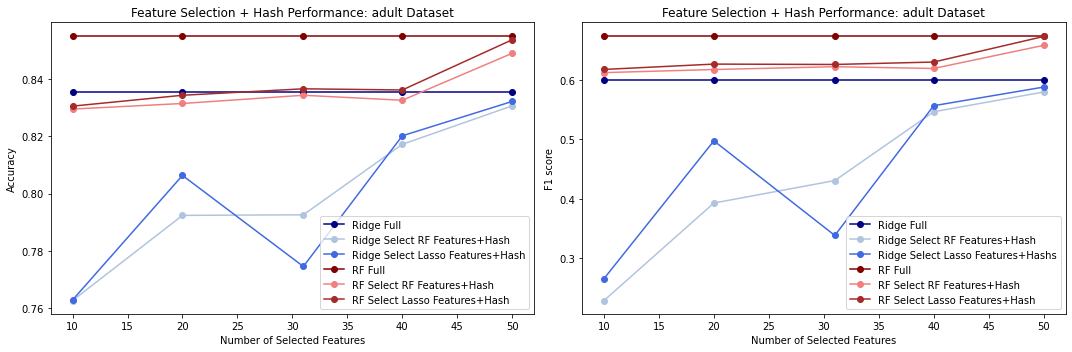

In [155]:
plot_scores(adult_scores, data_set_adult.X_train.shape[1], data_set_adult.name)

In [111]:
titanic_scores = compare_feature_hashing(data_set_titanic)

ridge_default
train duration 0.007002353668212891
train accuracy 0.8538681948424068
train f1 0.7994757536041939
train f1 neg 0.8850488354620586
train tn, fp, fn, tp [589  70  83 305]
test accuracy 0.8664122137404581
test f1 0.8223350253807108
test f1 neg 0.892966360856269
test tn, fp, fn, tp [146  10  25  81]

randfor_default
train duration 2.190999984741211
train accuracy 0.9808978032473734
train f1 0.9738903394255876
train f1 neg 0.9849397590361446
train tn, fp, fn, tp [654   5  15 373]
test accuracy 0.8244274809160306
test f1 0.7628865979381443
test f1 neg 0.8606060606060606
test tn, fp, fn, tp [142  14  32  74]

hash percent 0.2 n_features 4

hash duration 0.013003349304199219
ridge_hash
train duration 0.0042836666107177734
train accuracy 0.6953199617956065
train f1 0.44133099824868655
train f1 neg 0.7905449770190414
train tn, fp, fn, tp [602  57 262 126]
test accuracy 0.6221374045801527
test f1 0.2773722627737226
test f1 neg 0.744186046511628
test tn, fp, fn, tp [144  12  87  19]


train duration 2.151966094970703
train accuracy 0.9808978032473734
train f1 0.9738903394255876
train f1 neg 0.9849397590361446
train tn, fp, fn, tp [654   5  15 373]
test accuracy 0.8282442748091603
test f1 0.7668393782383419
test f1 neg 0.8640483383685802
test tn, fp, fn, tp [143  13  32  74]

randfor_rf_hash
train duration 2.151827573776245
train accuracy 0.9808978032473734
train f1 0.9738903394255876
train f1 neg 0.9849397590361446
train tn, fp, fn, tp [654   5  15 373]
test accuracy 0.8320610687022901
test f1 0.7731958762886597
test f1 neg 0.8666666666666667
test tn, fp, fn, tp [143  13  31  75]

randfor_lasso_hash
train duration 2.0472683906555176
train accuracy 0.9379178605539638
train f1 0.9148099606815203
train f1 neg 0.9511645379413974
train tn, fp, fn, tp [633  26  39 349]
test accuracy 0.8664122137404581
test f1 0.8186528497409327
test f1 neg 0.8942598187311177
test tn, fp, fn, tp [148   8  27  79]



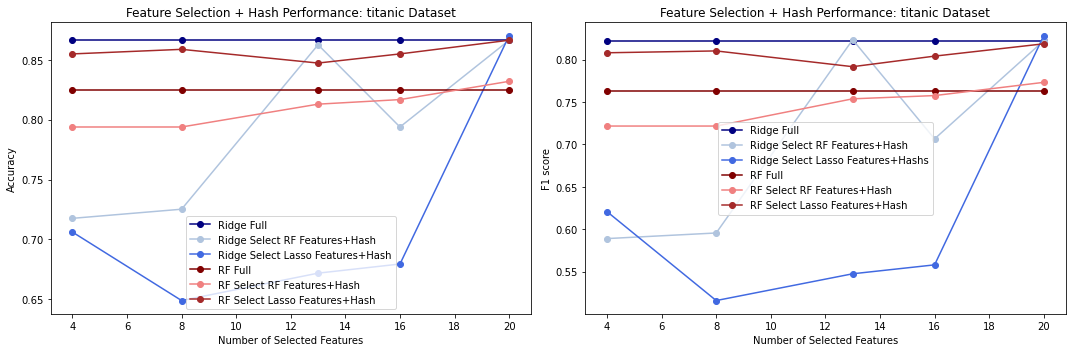

In [156]:
plot_scores(titanic_scores, data_set_titanic.X_train.shape[1], data_set_titanic.name)

In [136]:
weather_scores = compare_feature_hashing(data_set_weather)

ridge_default
train duration 0.022998571395874023
train accuracy 0.7865
train f1 0.7819481680071493
train f1 neg 0.7908656789518794
train tn, fp, fn, tp [6459 1539 1877 6125]
test accuracy 0.78525
test f1 0.7792341300436905
test f1 neg 0.7909467023606717
test tn, fp, fn, tp [1625  377  482 1516]

randfor_default
train duration 8.701045274734497
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [7998    0    0 8002]
test accuracy 0.81025
test f1 0.810675979047144
test f1 neg 0.8098220997243799
test tn, fp, fn, tp [1616  386  373 1625]

hash percent 0.2 n_features 6

hash duration 0.33800506591796875
ridge_hash
train duration 0.01700282096862793
train accuracy 0.72675
train f1 0.7170958975022648
train f1 neg 0.7357669527378217
train tn, fp, fn, tp [6087 1911 2461 5541]
test accuracy 0.731
test f1 0.7208095485210171
test f1 neg 0.7404727448142788
test tn, fp, fn, tp [1535  467  609 1389]

ridge_rf_hash
train duration 0.020002126693725586
train accuracy 0.725875
train f

randfor_hash
train duration 33.142762899398804
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [7998    0    0 8002]
test accuracy 0.796
test f1 0.7934177215189874
test f1 neg 0.7985185185185186
test tn, fp, fn, tp [1617  385  431 1567]

randfor_rf_hash
train duration 31.35633683204651
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [7998    0    0 8002]
test accuracy 0.7985
test f1 0.796875
test f1 neg 0.8000992063492064
test tn, fp, fn, tp [1613  389  417 1581]

randfor_lasso_hash
train duration 31.79002594947815
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [7998    0    0 8002]
test accuracy 0.79425
test f1 0.7919089759797725
test f1 neg 0.7965389369592089
test tn, fp, fn, tp [1611  391  432 1566]



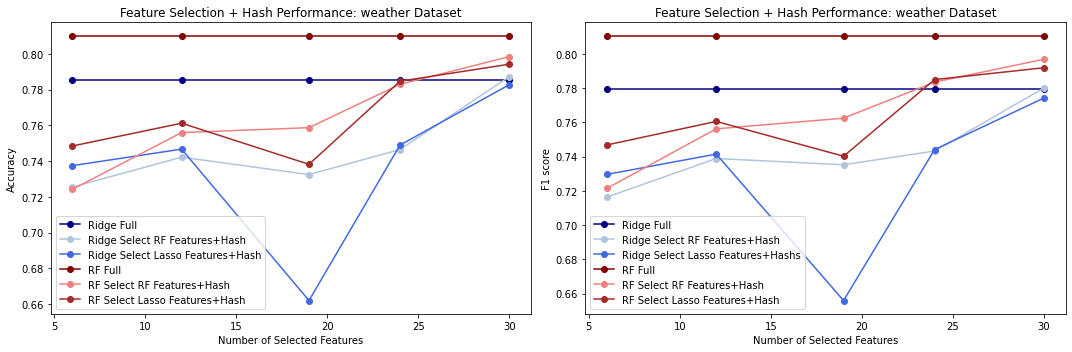

In [157]:
plot_scores(weather_scores, data_set_weather.X_train.shape[1], data_set_weather.name)

In [123]:
wine_scores = compare_feature_hashing(data_set_wine)

ridge_default
train duration 0.006002187728881836
train accuracy 0.7498045347928068
train f1 0.7615499254843517
train f1 neg 0.736842105263158
train tn, fp, fn, tp [448 148 172 511]
test accuracy 0.740625
test f1 0.7477203647416415
test f1 neg 0.7331189710610932
test tn, fp, fn, tp [114  34  49 123]

randfor_default
train duration 2.0444180965423584
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [596   0   0 683]
test accuracy 0.81875
test f1 0.8242424242424243
test f1 neg 0.8129032258064517
test tn, fp, fn, tp [126  22  36 136]

hash percent 0.2 n_features 3

hash duration 0.011036872863769531
ridge_hash
train duration 0.002997875213623047
train accuracy 0.6325254104769351
train f1 0.705513784461153
train f1 neg 0.5114345114345114
train tn, fp, fn, tp [246 350 120 563]
test accuracy 0.615625
test f1 0.6854219948849104
test f1 neg 0.5060240963855422
test tn, fp, fn, tp [ 63  85  38 134]

ridge_rf_hash
train duration 0.005011081695556641
train accuracy 0.724784988

train duration 2.25700044631958
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [596   0   0 683]
test accuracy 0.821875
test f1 0.8277945619335347
test f1 neg 0.8155339805825244
test tn, fp, fn, tp [126  22  35 137]

randfor_rf_hash
train duration 2.212968349456787
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [596   0   0 683]
test accuracy 0.815625
test f1 0.8228228228228228
test f1 neg 0.8078175895765473
test tn, fp, fn, tp [124  24  35 137]

randfor_lasso_hash
train duration 2.4460017681121826
train accuracy 1.0
train f1 1.0
train f1 neg 1.0
train tn, fp, fn, tp [596   0   0 683]
test accuracy 0.790625
test f1 0.7963525835866262
test f1 neg 0.784565916398714
test tn, fp, fn, tp [122  26  41 131]



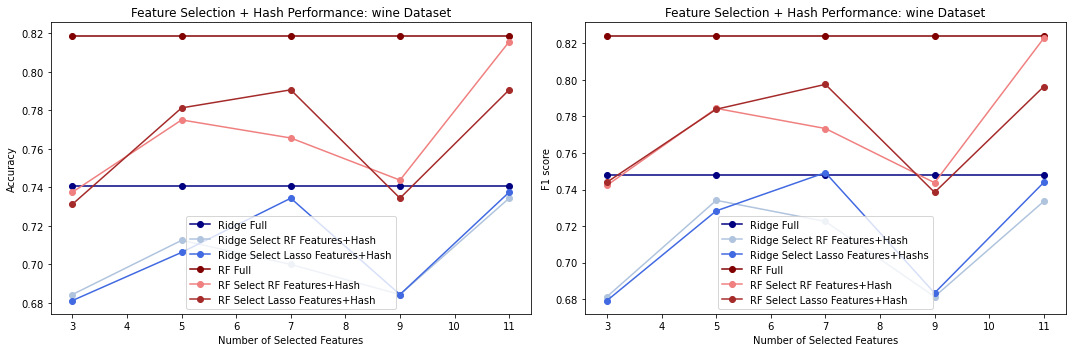

In [158]:
plot_scores(wine_scores, data_set_wine.X_train.shape[1], data_set_wine.name)